In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error

### read the data

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
diamonds=pd.read_csv("diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()
diamonds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
print(diamonds.cut.value_counts(),diamonds.color.value_counts(),diamonds.clarity.value_counts(),sep="\n")

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


# outliers and set index

In [ ]:
diamonds.set_index("Unnamed: 0",inplace=True)

In [ ]:
def remove_outliers(df_name):
  des_df = df_name.describe()
  for col in list(des_df):
    Q1= des_df[col].loc["25%"]
    Q3= des_df[col].loc["75%"]
    IQR = Q3-Q1
    lower_limit = Q1-(IQR*1.5)
    upper_limit = Q3+(IQR*1.5)
    
    df_name = df_name[((df_name[col]> lower_limit) & (df_name[col] < upper_limit))]
  return df_name

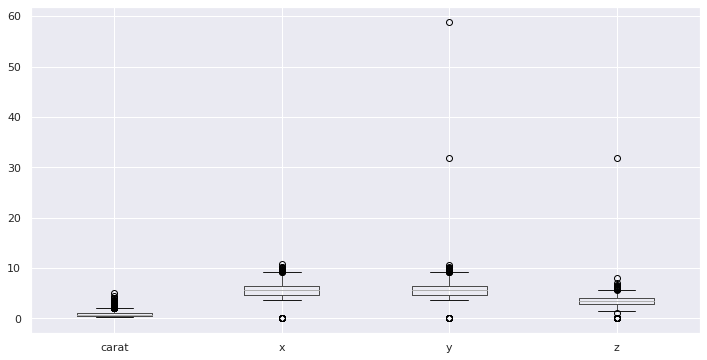

In [ ]:
diamonds.boxplot(column= ["carat" ,"x" , "y" , "z" ] , figsize= (12,6))
plt.show()

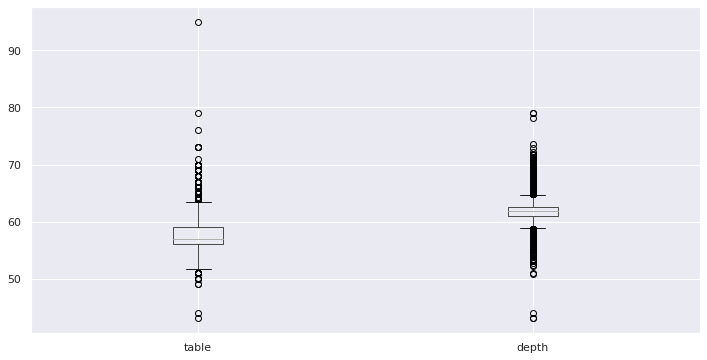

In [ ]:
diamonds.boxplot(column= ["table" , "depth"] , figsize= (12,6))
plt.show()

In [ ]:
diamonds=remove_outliers(diamonds)
len(diamonds.index)

47483

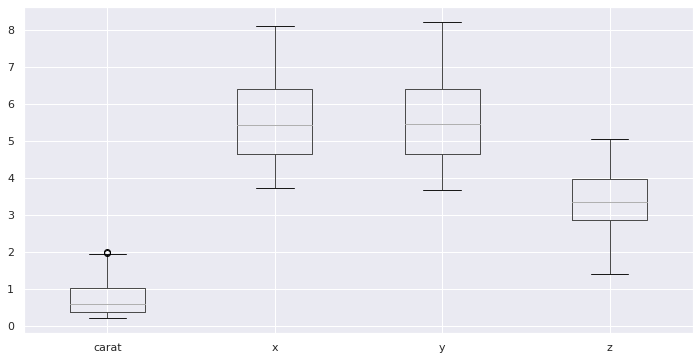

In [ ]:
diamonds.boxplot(column= ["carat" ,"x" , "y" , "z" ] , figsize= (12,6))
plt.show()

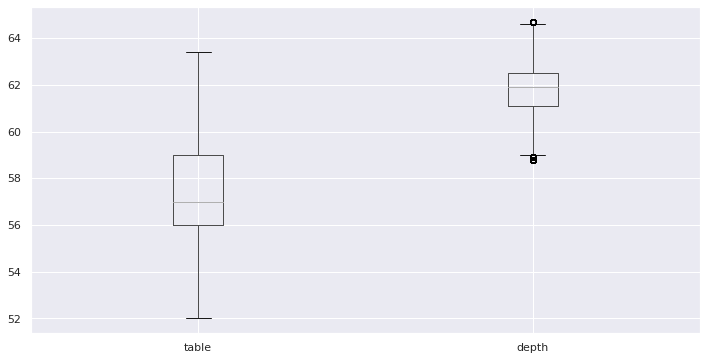

In [ ]:
diamonds.boxplot(column= ["table" , "depth"] , figsize= (12,6))
plt.show()

# Convert categorical attributes 

In [ ]:
# cattagores=diamonds[categorical_features]
# # cattagores=np.array(cattagores)
# # cattagores.reshape(-1, 1)
# cattagores=pd.DataFrame(cattagores)
# oe=OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
#                                 ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
#                                 ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
# categorical_features = diamonds.select_dtypes(include="object").columns
# cat_attrebut=cattagores.apply(oe.fit_transform)
# cattagores
##################################################################
cut=diamonds["cut"]
color=diamonds["color"]
clarity=diamonds["clarity"]
cut=pd.DataFrame(cut)
color=pd.DataFrame(color)
clarity=pd.DataFrame(clarity)
############################################
oe=OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
num_cut=oe.fit_transform(cut)
num_cut=pd.DataFrame(num_cut)
oe=OrdinalEncoder(categories = [['J', 'I', 'H', 'G', 'F', 'E', 'D']])
num_color=oe.fit_transform(color)
num_color=pd.DataFrame(num_color)
oe=OrdinalEncoder(categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
num_clarity=oe.fit_transform(clarity)
num_clarity=pd.DataFrame(num_clarity)

# add attributes

In [ ]:
new_diamonds=diamonds.drop(["x","y","z","cut","color","clarity"],axis=1)

In [ ]:
new_diamonds["size"]=diamonds["x"]*diamonds["y"]*diamonds["z"]
diamonds["size"]=diamonds["x"]*diamonds["y"]*diamonds["z"]
new_diamonds["table_width"] = diamonds["table"]*diamonds["y"]/100
new_diamonds["depth_of_diamond"] = diamonds["depth"]*diamonds["y"]/100

In [ ]:
new_diamonds["num_cut"]=num_cut
new_diamonds["num_color"]=num_color
new_diamonds["num_clarity"]=num_clarity############ يوجد تعديل حسب الكود فوق 

# graphics

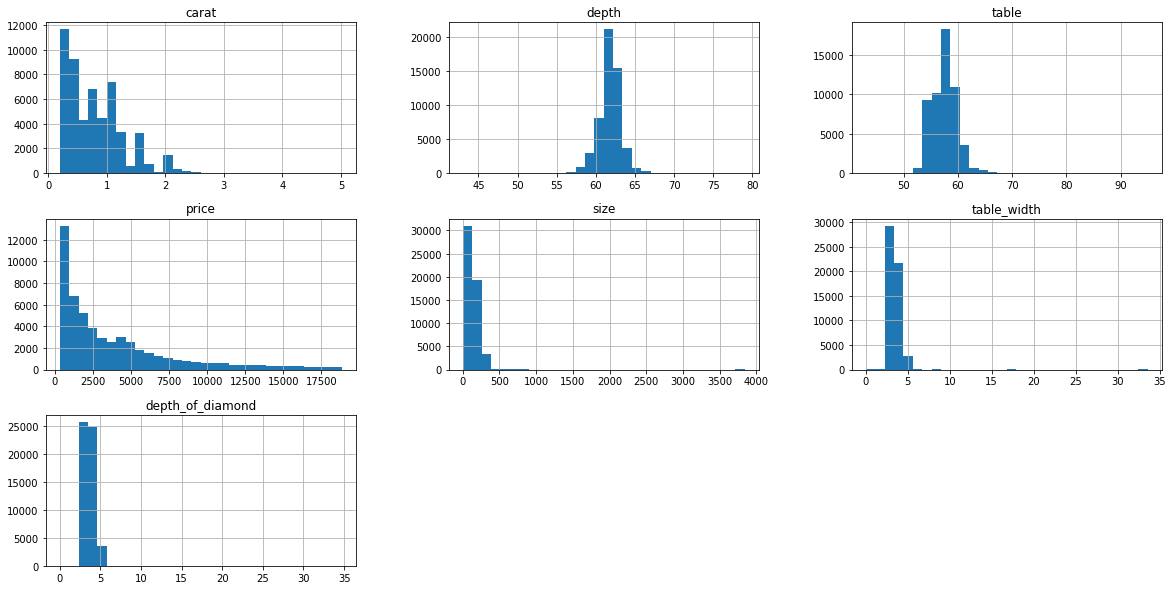

In [ ]:

new_diamonds.hist(bins=30,figsize=(20,10))
plt.show()

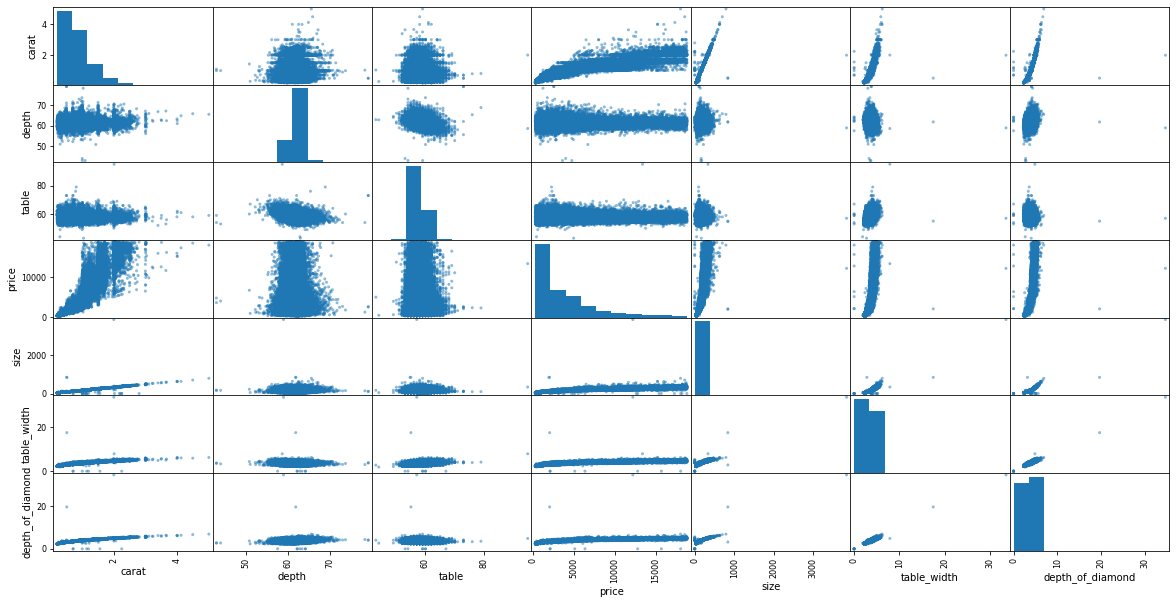

In [ ]:
pd.plotting.scatter_matrix(new_diamonds,figsize=(20,10))
plt.show()

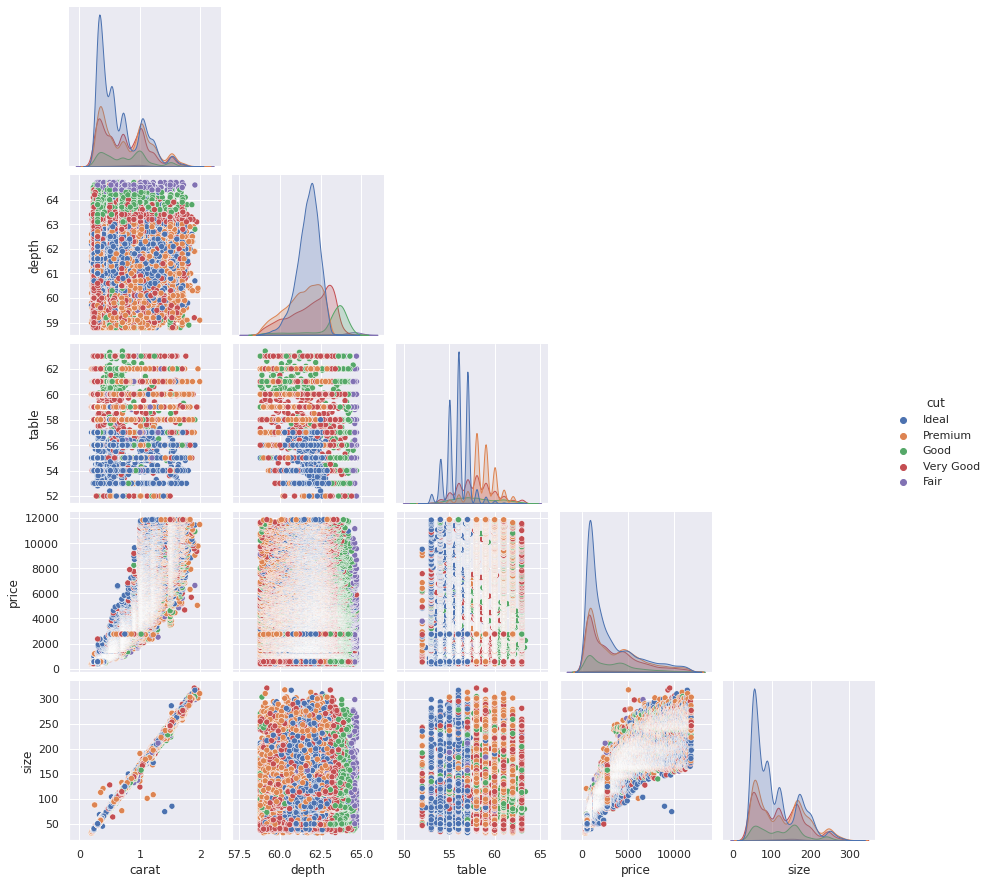

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.pairplot(diamonds.drop(["x","y","z"],axis=1), hue="cut",corner=True)
plt.show()

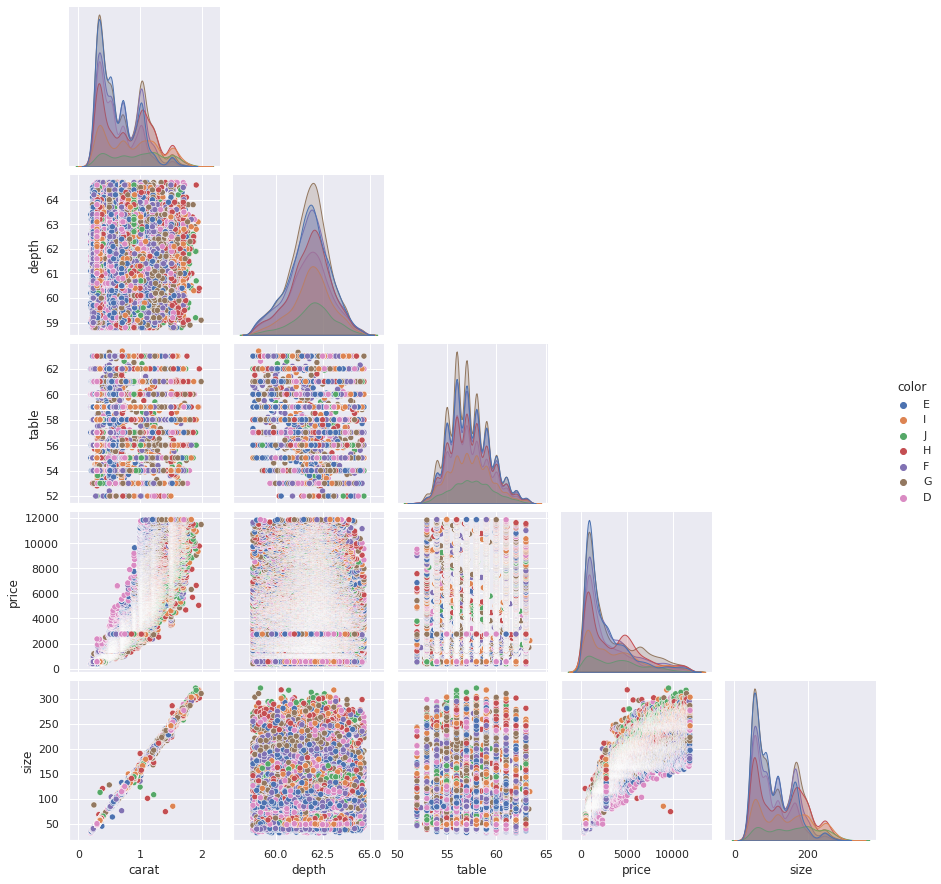

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.pairplot(diamonds.drop(["x","y","z"],axis=1), hue="color",corner=True)
plt.show()

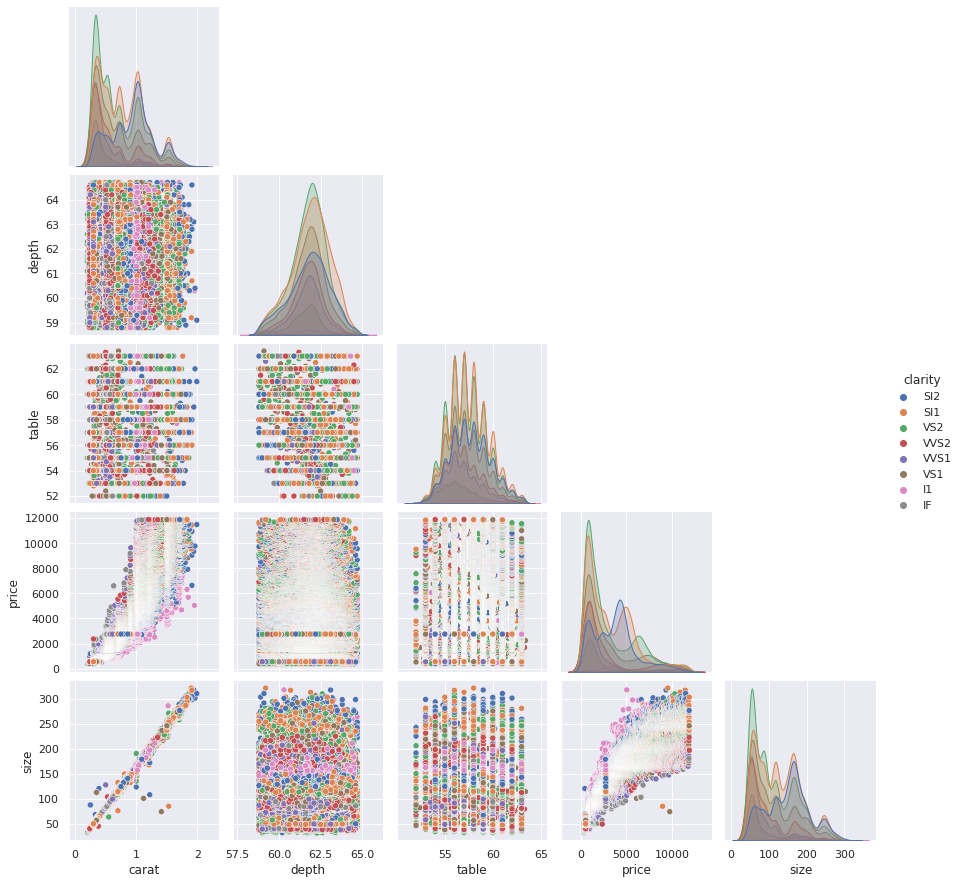

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.pairplot(diamonds.drop(["x","y","z"],axis=1), hue="clarity",corner=True)
plt.show()

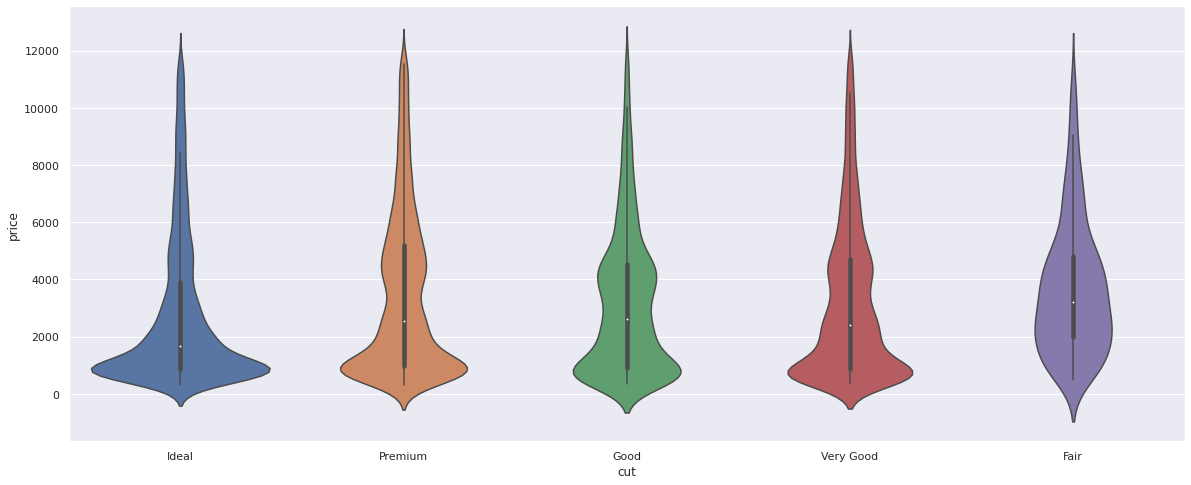

In [ ]:
sns.violinplot(x=diamonds["cut"], y=diamonds["price"])
plt.show()

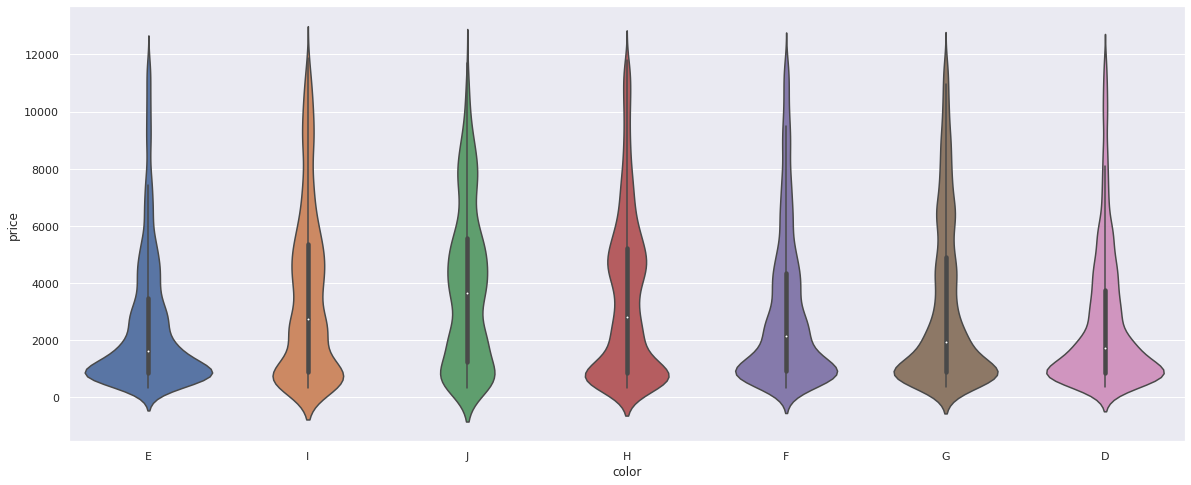

In [ ]:
sns.violinplot(x=diamonds["color"], y=diamonds["price"])
plt.show()

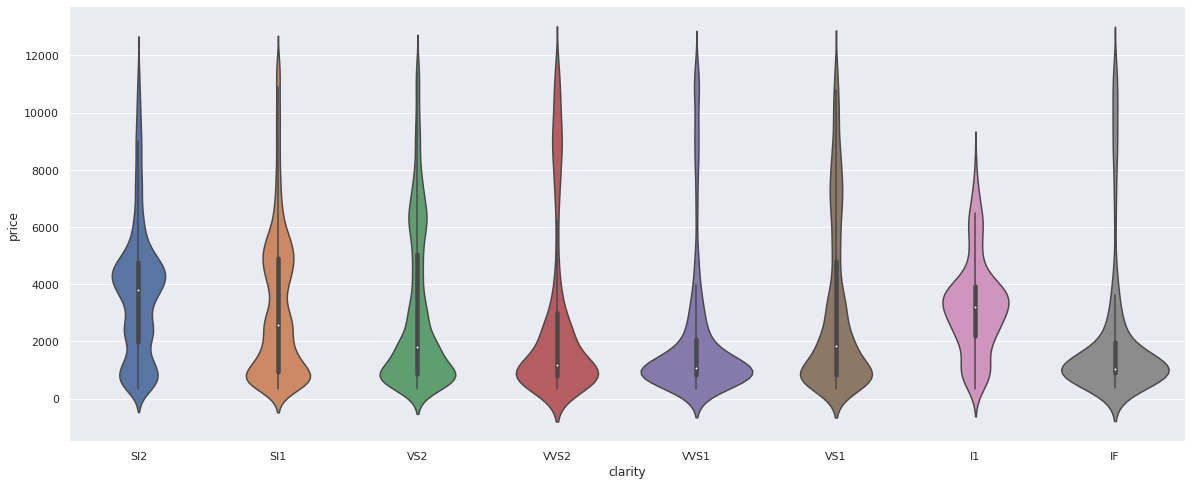

In [ ]:
sns.violinplot(x=diamonds["clarity"], y=diamonds["price"])
plt.show()

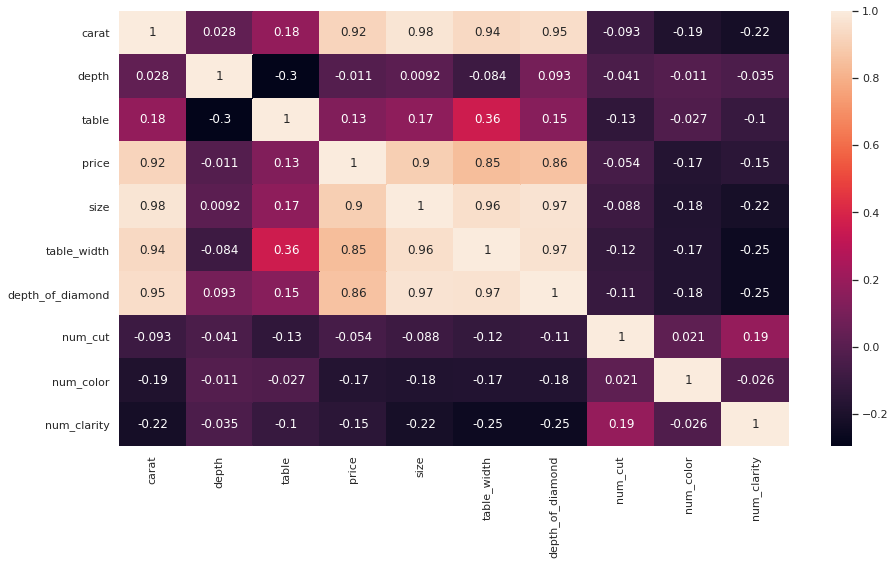

In [ ]:
cor=new_diamonds.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,annot = True)
plt.show()

# split data and pipeline

In [ ]:
cut=diamonds["cut"]
cut=pd.DataFrame(cut)
oe=OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
num_cut=oe.fit_transform(cut)
num_cut=pd.DataFrame(num_cut)
diamonds["num_cut"]=num_cut
######################################################################################
diamonds.set_index("Unnamed: 0",inplace=True)
diamonds=remove_outliers(diamonds)
######################################################################################
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(diamonds, diamonds["num_cut"]):
  strat_train_set = diamonds.iloc[train_index]
  strat_test_set = diamonds.iloc[test_index]
######################################################################################
label = strat_train_set["price"].copy()
strat_train_set = strat_train_set.drop("price", axis=1)
strat_train_set.drop("num_cut",axis=1,inplace=True)
strat_test_set.drop("num_cut",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical_features = strat_train_set.select_dtypes(include="object").columns
integer_features = strat_train_set.select_dtypes(exclude="object").columns
print(categorical_features,integer_features,sep="\n")

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [ ]:
class adder:
  def __init__(self,aa=True):
    self.aa=aa 
  def fit(self,data,y=None):
    return self
  def transform(self,data,y=None):
    ######################################################
    table_width = data["table"]*data["y"]/100
    depth_of_diamond = data["depth"]*data["y"]/100
    size=data["x"]*data["y"]*data["z"]
    ######################################################
    data.drop(["x","y","z","table","depth"],inplace=True,axis=1)
    ######################################################
    return np.c_[data,table_width,depth_of_diamond,size]

In [ ]:
num_pipeline = Pipeline([
 ('attribs_adder', adder()), 
 ('standard_scaler', StandardScaler())])
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, integer_features),
 ("cat",OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), categorical_features)])

In [ ]:
train_prepared = full_pipeline.fit_transform(strat_train_set)

# test py ml algorethem

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared,label)
forest_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(forest_predictions, label)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

137.8655794027055

# crose valedation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, train_prepared,label,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
  print(f"Scores : {scores}",f"Mean : {scores.mean()}",f"Standard deviation : {scores.std()}",sep="\n")
display_scores(forest_rmse_scores)

Scores : [400.43887915 359.53122431 347.8362166  349.27035061 350.9965023
 368.88711286 373.25456673 364.70267241 371.51251665 394.84821649]
Mean : 368.12782581112464
Standard deviation : 17.15450034599339


# fine tune

In [ ]:
from sklearn.model_selection import GridSearchCV
model_params = [{'n_estimators': [205], 'max_features': [4]},{'bootstrap': [True]}]
grid_search = GridSearchCV(forest_reg, model_params, cv=10,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(train_prepared, label)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=205, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

360.5291413880689 {'max_features': 4, 'n_estimators': 205}
368.5587472217293 {'bootstrap': True}


In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
x=final_model.score(train_prepared, label)
x

0.9976029194949564

In [ ]:
X=final_model.score(test_prepared, label_test)
X

0.982148391412976

In [ ]:
import joblib 
joblib.dump(final_model,"forest_reg.sav")

['forest_reg.sav']

# test

In [ ]:
label_test = strat_test_set["price"].copy()
strat_test_set = strat_test_set.drop("price", axis=1)
test_prepared = full_pipeline.fit_transform(strat_test_set)

In [ ]:
housing_predictions = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(housing_predictions, label_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

371.5552290601898

In [ ]:
final_predictions = final_model.predict(test_prepared)
final_mse = mean_squared_error(label_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse
# final_model.score(test_prepared,label_test)

366.2939937013836

/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:627: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


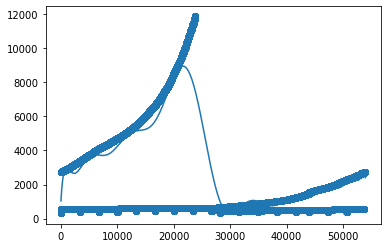

In [ ]:
mymodel = np.poly1d(np.polyfit(label.index,label,61))

myline = np.linspace((label.index ).min(), (label.index ).max(), len(label.index))

plt.scatter(label.index,label)
plt.plot(myline, mymodel(myline))
plt.show()